<font size = 5 face = bold>__DS223 - Marketing Analytics__

<font size = 5 face = bold>__Homework 3: Survival Analysis__

In [1]:
from functions import *

import warnings
from warnings import filterwarnings 
warnings.filterwarnings("ignore", category = DeprecationWarning) 
filterwarnings('ignore')

<font face = bold>   
    
__Data Manipulation & Dummification__

At this stage the `telco.csv` data is read, manipulated, dummified (with respect to all the categorical variables across the dataset) to perform survival analysis.

In [2]:
data = pd.read_csv('telco.csv')
data.set_index('ID', inplace = True)
data['churn'] = pd.Series(np.where(data.churn.values == "Yes", True, False), data.index)

In [3]:
dummy_columns = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']
survival_data = pd.get_dummies(data, columns = dummy_columns, prefix = dummy_columns, drop_first = True)
survival_data.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13,44,9,64,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11,33,7,136,True,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68,52,24,116,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33,33,12,33,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23,30,9,30,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False


_________

<font face = bold>   
    
__Model Initialization, Fitting & Summary__

At this stage models from `lifelines` package relevant to AFT are initialized, namely _Weibull, Log-Normal, Log-Logistic, Exponential_, then fitted into the survival data to gain the summary using the __fit_models_summary__ function defined in `functions.py`.


In [4]:
models = {
    'Weibull': WeibullFitter(),
    'Log-Normal': LogNormalFitter(),
    'Log-Logistic': LogLogisticFitter(),
    'Exponential': ExponentialFitter()
}

In [5]:
fit_models_summary(models, survival_data)

Weibull Model Summary:
               coef   se(coef)  coef lower 95%  coef upper 95%  cmp to   
lambda_  138.090529  12.380640      113.824920      162.356139     1.0  \
rho_       0.945759   0.050872        0.846051        1.045467     1.0   

                 z             p   -log2(p)  
lambda_  11.072976  1.696715e-28  92.251243  
rho_     -1.066223  2.863227e-01   1.804286  
 


Log-Normal Model Summary:
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to          z   
mu_     4.772876  0.103626        4.569772        4.975979     0.0  46.058562  \
sigma_  1.805942  0.085990        1.637404        1.974480     1.0   9.372462   

                   p   -log2(p)  
mu_     0.000000e+00        inf  
sigma_  7.085975e-21  66.935524  
 
Log-Logistic Model Summary:
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to   
alpha_  103.387420  9.127055       85.498721      121.276119     1.0  \
beta_     1.040114  0.054839        0.932632        1.147596     1.0   

                z             p   -log2(p)  
alpha_  11.218013  3.326611e-29  94.601862  
beta_    0.731490  4.644798e-01   1.106312  
 
Exponential Model Summary:
               coef  se(coef)  coef lower 95%  coef upper 95%  cmp to   
lambda_  129.656934  7.832862      114.304807      145.009061     0.0  \

                 z             p    -log2(p)  
lambda_  16.552945  1.5

<font face = bold>   
    
__Visualization & Model Comparison__

At this stage survival curves for the above models from `lifelines` package are plotted to gain a visual summary using the __visualize_survival_curves__ function defined in `functions.py`. <br> Furthermore, AIC scores were used to make the comprehensive decision on the best model for further AFT model usage through __compare_models_aic__ function again defined in `functions.py`.

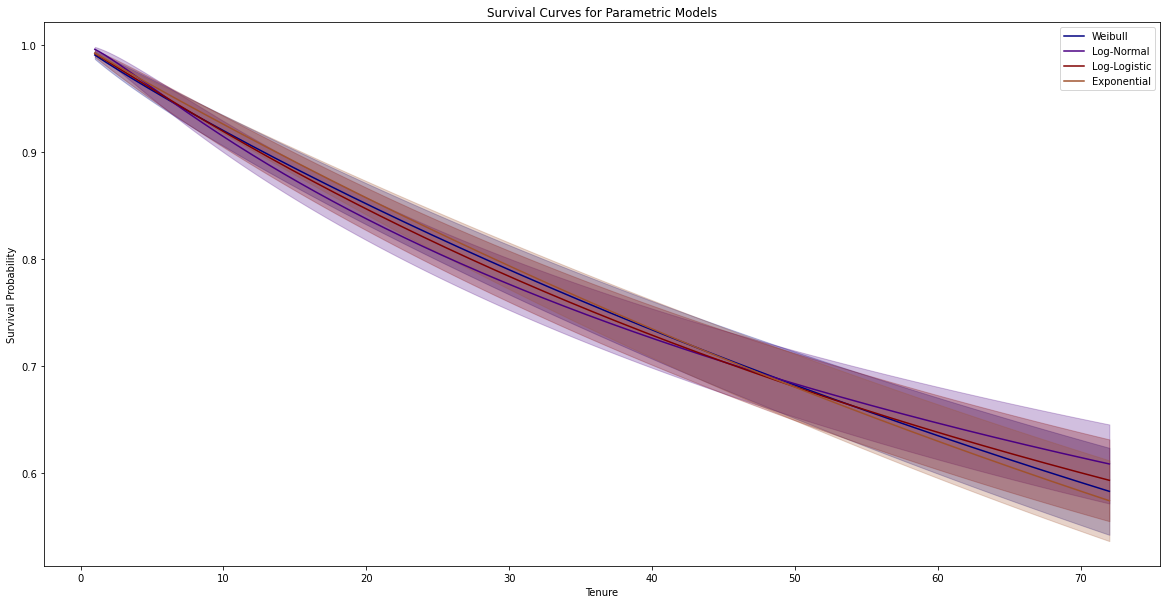

In [6]:
visualize_survival_curves(models)

In [7]:
compare_models_aic(models)

Best Model based on AIC: Log-Normal


_________

<font face = bold>   
    
__AFT Initialization with the Best Model__

At this stage the best model is decided and the respective AFT model from `lifelines` package is initialized, fitted and its summary is printed for view. 

In [8]:
from lifelines import LogNormalAFTFitter

In [9]:
best_model = LogNormalAFTFitter()  
best_model.fit(survival_data, duration_col='tenure', event_col='churn')
best_model.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-25 17:10:16 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

<font face = bold>   
    
__Final AFT Initialization with Significant Features__

At this stage the output of the best AFT model above is used to filter out features with respect to 95% significance. <br>
Features with _absolute value of z-scores greater than 1.96_ or with _p-values less than 0.05_ are marked significant and passed on to the final model along with churn and tenure, of course.

In [10]:
significant_features = ['tenure', 'churn', 'address', 'age', 'custcat_E-service', 
                        'custcat_Plus service', 'custcat_Total service','internet_Yes', 'marital_Unmarried', 'voice_Yes']

final_model = LogNormalAFTFitter()
final_model.fit(survival_data[significant_features], duration_col = 'tenure', event_col = 'churn')
final_model.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-25 17:10:18 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

_________

<font face = bold>   
    
__CLV Calculation and Segment-wise Analysis__

At this stage we are up to CLV calculation using survival function prediction and applying it to  customers thourgh row-sum after which CLV score per customer is added to the survival data table as a new column through __calculate_and_add_clv__ function defined in `functions.py`.

As for the Segment-wise Analysis, distribution of CLV scores with respect to significant features as segments is plotted using the __plot_clv_distribution_by_segments__ function defined in `functions.py`.


In [11]:
calculate_and_add_clv(final_model, survival_data)
survival_data.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,...,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,CLV
ID,,,,,,,,,,,,,,,,,,,,,
1,13,44,9,64,True,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,55.826429
2,11,33,7,136,True,False,True,False,False,False,...,False,False,True,True,False,True,False,False,True,56.671004
3,68,52,24,116,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,70.239675
4,33,33,12,33,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,43.840925
5,23,30,9,30,False,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,59.941310


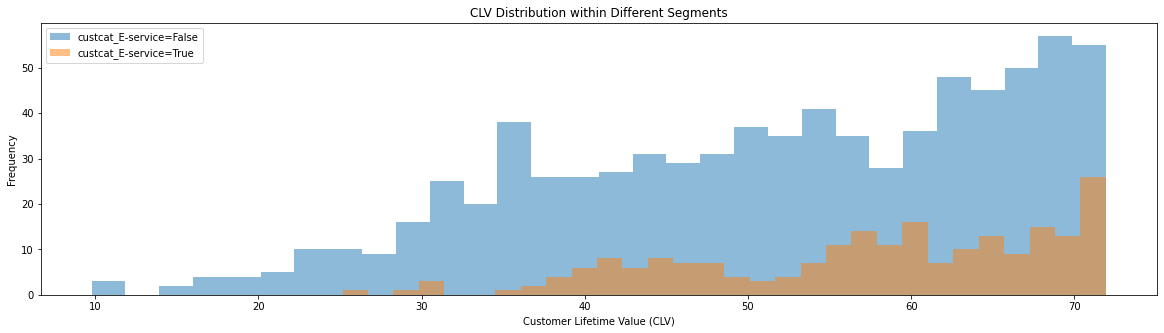

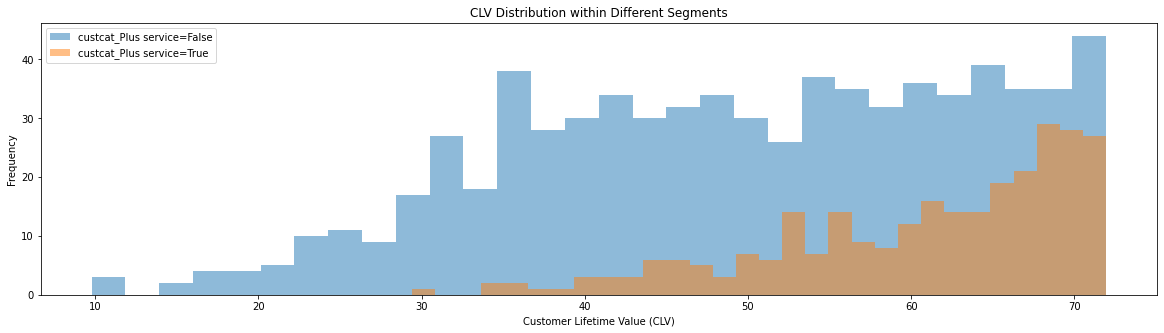

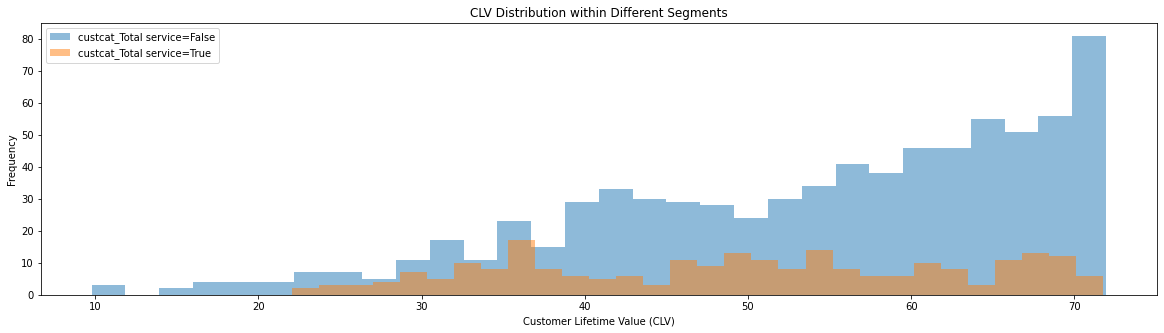

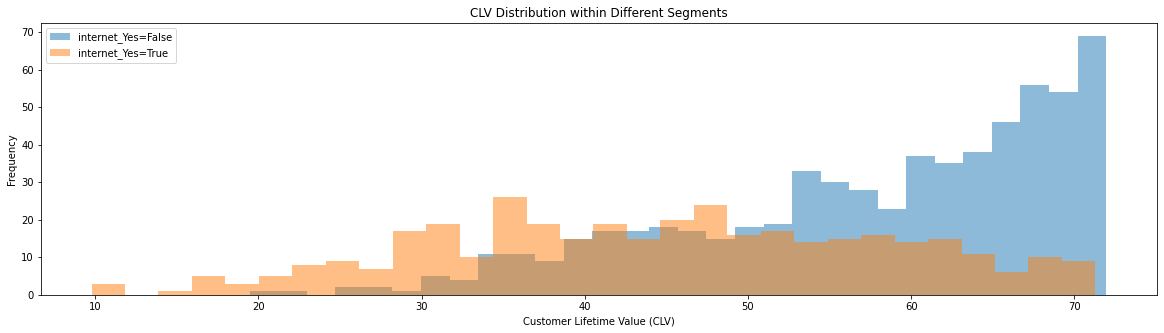

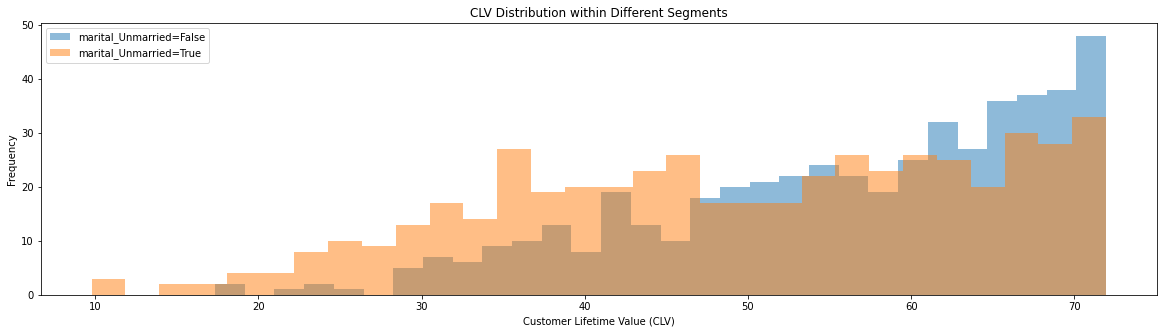

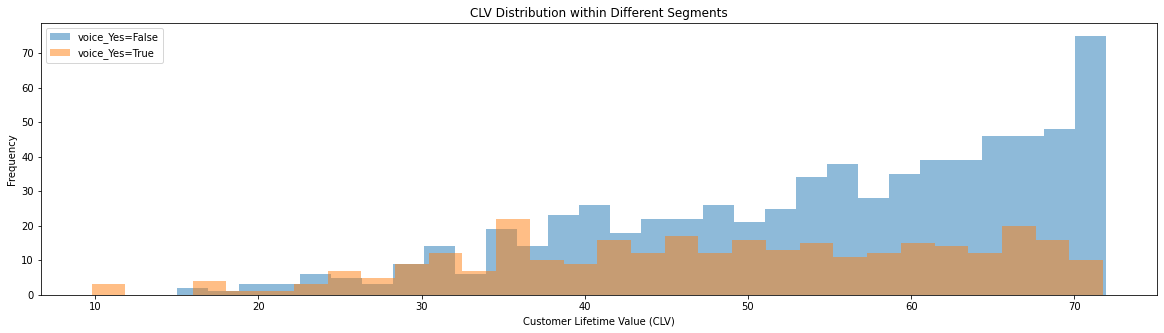

In [12]:
segments = ['custcat_E-service', 'custcat_Plus service', 'custcat_Total service', 
            'internet_Yes', 'marital_Unmarried', 'voice_Yes']

plot_clv_distribution_by_segments(survival_data, segments)

_________

<font face = bold>   
    
__Report__

<font face = bold>   
    
__Interpretation of Coefficients__

a. <ins> Address and Age

> The coefficients for address and age are both positive, suggesting that longer tenure and older age are associated with a higher churn risk.

> For every unit increase in the number of years living in the same address (address), the hazard increases by 1.04 times.

> Similarly, for every unit increase in age (age), the hazard increases by 1.04 times.

b. <ins> Customer Categories

> Generally, higher customer categories (custcat_E-service, custcat_Plus service, custcat_Total service) are associated with a higher hazard.

> For instance, being in the custcat_E-service category increases the hazard by 2.79 times compared to other categories.

c. <ins> Internet, Marital Status, and Voice Service

> Subscribers with internet (internet_Yes) have a lower hazard, indicating that having internet service is associated with a reduced risk of churn.

> Unmarried subscribers (marital_Unmarried) also have a lower hazard.

> Subscribers with voice service (voice_Yes) have a lower hazard.

d. <ins> Intercept

> The intercept (Intercept) represents the baseline hazard, and its positive coefficient suggests an inherent risk.

<font face = bold>   
    
__Most Valuable Segments__

> In the context of our case, I would define "valuable customers" as the ones with a high Customer Lifetime Value (CLV).

> While talking about segments, the ones that contribute significantly to revenue and have a lower churn risk will be considered valuable. As such, based on the model, segments with negative coefficients (reducing the hazard) or smaller hazard ratios are valuable, namely __Marital Status__, __Internet__ and __Voice Service__ segments.


<font face = bold>   
    
__Annual Retention Budget Calculation__

<ins> Steps
> 1. Choosing the relative scale of potential retention efforts (e.g., small, medium, large) per customer.

> 2. Identifying the number of subscribers at risk within a year with respect to CLV score with a threshold of 50%.

> 3. Determining the annual retention budget based on the cost of retention per customer and the number of at-risk customers.

Assuming the medium scale of per customer retention efforts, given the already calculated CLV scores based on the final AFT model, using the __calculate_annual_retention_budget__ function defined in `functions.py` we obtain the below results.

In [13]:
calculate_annual_retention_budget(final_model, survival_data, retention_scale = "medium")

Number of Subscribers at Risk: 72
Predicted Annual Retention Budget: $9000


<font face = bold>   
    
__Retention Suggestions__

<ins> a. Targetting High CLV Segments
> Accentuating retention efforts on segments with high CLV.

<ins> b. Enhancing Internet Services
> Since having internet reduces churn risk, it might be efficient to consider enhancing internet services.

<ins> c. Grip on Older Subscribers
> Introducing retention strategies for older subscribers, as they have a higher churn risk.

<ins> d. Personalized Marketing
> Developing personalized marketing campaigns for different customer categories.

__________